In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,load_model
from sklearn.decomposition import PCA

epoch_range = 500

In [2]:
def PCA_ret(weights):    
    pca = PCA(n_components=2)
    pca.fit(np.transpose(weights))
    x = []
    y = []
    a = pca.components_
    for i in range(pca.components_.shape[1]):
        x.append(pca.components_[0][i])
        y.append(pca.components_[1][i])
    return x,y

No GPU found
DNN1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 11,018,762
Trainable params: 11,018,762
Non-trainable params: 0
______________________________________________

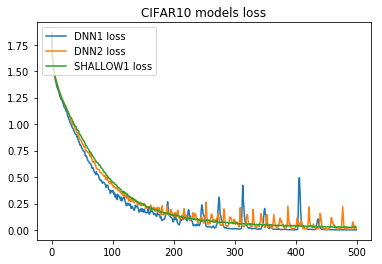

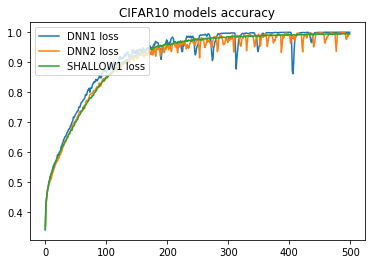

In [3]:
if __name__ == '__main__':
    
    
    ###comment this code, if you want to use your default gpu. I change to CPU becuase
    ###I get Resource exhausted on my GPU = =.
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
    ###
    if tf.test.gpu_device_name():
        print('GPU found')
    else:
        print("No GPU found")

    
    DNN1 = load_model("CIFAR10_DNN1.h5")
    DNN2 = load_model("CIFAR10_DNN2.h5")
    SHALLOW1 = load_model("CIFAR10_SHALLOW1.h5")
    print("DNN1")
    DNN1.summary()
    print()
    
    print("DNN2")
    DNN2.summary()
    print()
    
    print("SHALLOW")
    SHALLOW1.summary()
    print()
    
    DNN1_loss = np.load('CIFAR10_DNN1_LOSS.npy')
    DNN2_loss = np.load('CIFAR10_DNN2_LOSS.npy')
    SHALLOW1_loss = np.load('CIFAR10_SHALLOW1_LOSS.npy')
    plt.plot(range(epoch_range), DNN1_loss)
    plt.plot(range(epoch_range), DNN2_loss)
    plt.plot(range(epoch_range), SHALLOW1_loss)
    plt.title('CIFAR10 models loss')
    plt.legend(['DNN1 loss', 'DNN2 loss','SHALLOW1 loss','ground truth'], loc='upper left')
    plt.show()
    
    DNN1_acc = np.load('CIFAR10_DNN1_ACC.npy')
    DNN2_acc = np.load('CIFAR10_DNN2_ACC.npy')
    SHALLOW1_acc = np.load('CIFAR10_SHALLOW1_ACC.npy')
    plt.plot(range(epoch_range), DNN1_acc)
    plt.plot(range(epoch_range), DNN2_acc)
    plt.plot(range(epoch_range), SHALLOW1_acc)
    plt.title('CIFAR10 models accuracy')
    plt.legend(['DNN1 loss', 'DNN2 loss','SHALLOW1 loss','ground truth'], loc='upper left')
    plt.show()


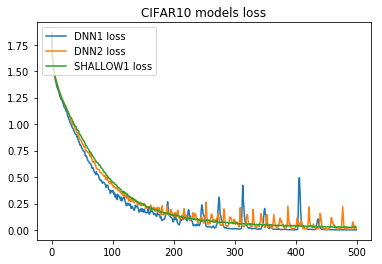

In [4]:
    DNN1_loss = np.load('CIFAR10_DNN1_LOSS.npy')
    DNN2_loss = np.load('CIFAR10_DNN2_LOSS.npy')
    SHALLOW1_loss = np.load('CIFAR10_SHALLOW1_LOSS.npy')
  
    plt.plot(range(epoch_range), DNN1_loss)
    plt.plot(range(epoch_range), DNN2_loss)
    plt.plot(range(epoch_range), SHALLOW1_loss)
    plt.title('CIFAR10 models loss')
    plt.legend(['DNN1 loss', 'DNN2 loss','SHALLOW1 loss','ground truth'], loc='upper left')
    plt.show()

In [7]:

    weights = np.load("CIFAR10_DNN1_WEIGHTS.npy")
    x,y = PCA_ret(weights)
    plt.scatter(x,y)
    
    weights = np.load("CIFAR10_DNN2_WEIGHTS.npy")
    x,y = PCA_ret(weights)
    plt.scatter(x,y)
    
    weights = np.load("CIFAR10_SHALLOW1_WEIGHTS.npy")
    x,y = PCA_ret(weights)
    plt.scatter(x,y)
    plt.legend(['DNN1 weights', 'DNN2 weights','SHALLOW1 weights'], loc='upper left')
    plt.show()

MemoryError: 